In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Functional API

In [34]:
inputs = keras.Input(shape = (8))

In [35]:
dense = layers.Dense(64, activation = 'relu')
x = dense(inputs)

In [36]:
x = layers.Dense(64, activation ='relu')(x)
outputs = layers.Dense(10)(x)

In [37]:
model = keras.Model(inputs = inputs, outputs = outputs, name = 'model1')

In [38]:
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 5,386
Trainable params: 5,386
Non-trainable params: 0
_________________________________________________________________


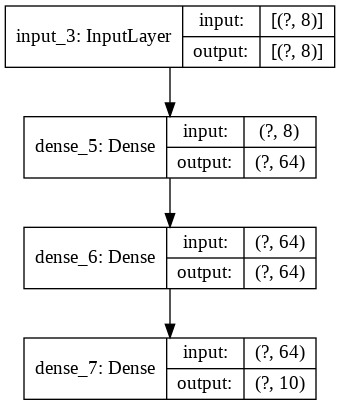

In [39]:
keras.utils.plot_model(model, '1.png', show_shapes = True)

In [40]:
df = pd.read_csv('/content/diabetes.csv')
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
model.compile(
    loss =  keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                                                       optimizer = keras.optimizers.RMSprop(),
                                                       metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 12, validation_split = 0.2)

In [53]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

6/6 - 0s - loss: 1.3164 - accuracy: 0.6510
Test loss: 1.316408634185791
Test accuracy: 0.6510416865348816


In [ ]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

Another example: using the same graph of layers to define multiple models, calling models like layers

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Ensembling models into a single model that averages their predictions

In [56]:
def get_model(a, b, c):
    inputs = keras.Input(shape=(128,))
    layer1 = layers.Dense(a)(inputs)
    layer2 = layers.Dense(b)(layer1)
    layer3 = layers.Dense(c)(layer2)
    outputs = layers.Dense(1)(layer3)
    return keras.Model(inputs, outputs)


model1 = get_model(16, 16, 16)
model2 = get_model(32, 32, 32)
model3 = get_model(64, 64, 64)

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)